In [1]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation as FA
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
# matplotlib.use('Qt5Agg')
from sklearn.decomposition import PCA
# %matplotlib notebook
%matplotlib inline

In [2]:
def seperater(arr):
    # global maximum
    pre_data = arr
    amp = np.abs(pre_data)
    # amp = amp / maximum
    phs = np.angle(pre_data)
    # phs = (phs - (- pi)) / (pi - (- pi))
    # sin = np.sin(phs)
    # sin = (sin + 1) / 2
    seperated_data = np.stack((amp,phs), axis=0)
    # seperated_data = np.expand_dims(seperated_data, axis=0)
    return seperated_data

In [3]:
asphalt = np.load('./road_data/asphalt/alsphalt.npy')
asphalt = seperater(asphalt)
bicycle = np.load('./road_data/bicycle/bicycle.npy')
bicycle = seperater(bicycle)
bicycle2 = np.load('./road_data/bicycle/bicycle2.npy')
bicycle2 = seperater(bicycle2)
block = np.load('./road_data/block/block.npy')
block = seperater(block)
block2 = np.load('./road_data/block/block2.npy')
block2 = seperater(block2)
floor = np.load('./road_data/floor/floor.npy')
floor = seperater(floor)
ground = np.load('./road_data/ground/ground1.npy')
ground = seperater(ground)
# ground = np.load('./road_data/ground/ground1.npy')

In [4]:
X = np.concatenate((asphalt[0], bicycle[0], block[0], floor[0], ground[0]), axis=0)

In [5]:
X.shape

(1500, 414)

In [6]:
from sklearn.preprocessing import normalize
data = normalize(X)

In [7]:
print(np.max(data))

0.11858371853750546


In [8]:
print(X.shape)

(1500, 414)


In [9]:
data_dict = {
    'asphalt' : asphalt,
    'bicycle' : bicycle,
    'block' : block,
    'floor' : floor,
    'ground' : ground,
}

In [10]:
ground.shape

(2, 300, 414)

In [11]:
print(np.max(asphalt[1]))

3.141592653589793


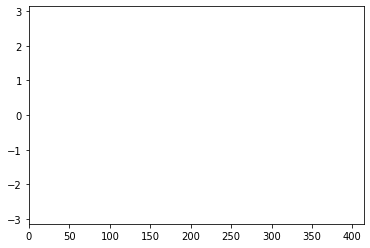

In [12]:
x, y = [], []
x = np.linspace(0,len(asphalt[0]), len(asphalt[0]))
fig = plt.figure()
ax = plt.axes(xlim = (0, asphalt.shape[2]), ylim = (-pi, pi))
# ax = plt.axes(xlim=(0,asphalt.shape[2]), ylim = (0,np.max(asphalt[0]))) # amp
line, = plt.plot([], [])

In [21]:
asphalt.shape

(2, 300, 414)

In [13]:
xs = np.linspace(0,asphalt.shape[2],asphalt.shape[2])
ys = np.linspace(0,asphalt.shape[1],asphalt.shape[1])
X, Y = np.meshgrid(xs, ys)

In [19]:
def plot_3d(arr, title):
    x = np.arange(arr.shape[2])
    y = np.arange(arr.shape[2])
    plt.figure(figsize=(20,30))
    axes = plt.axes(projection='3d')
    axes.plot_surface(x, y, arr[0][:])
    plt.title(title)
    plt.show()

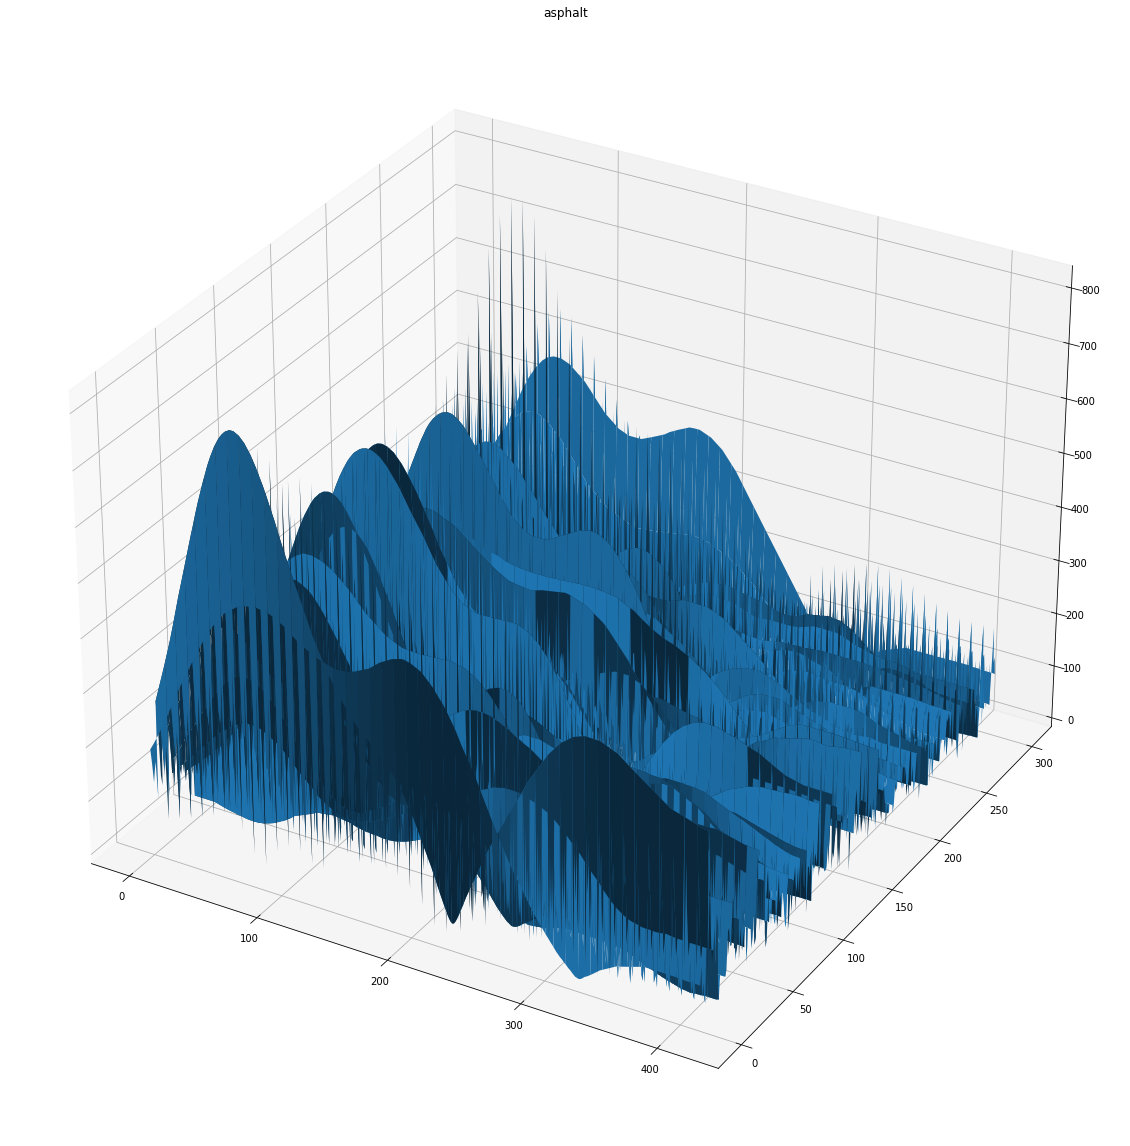

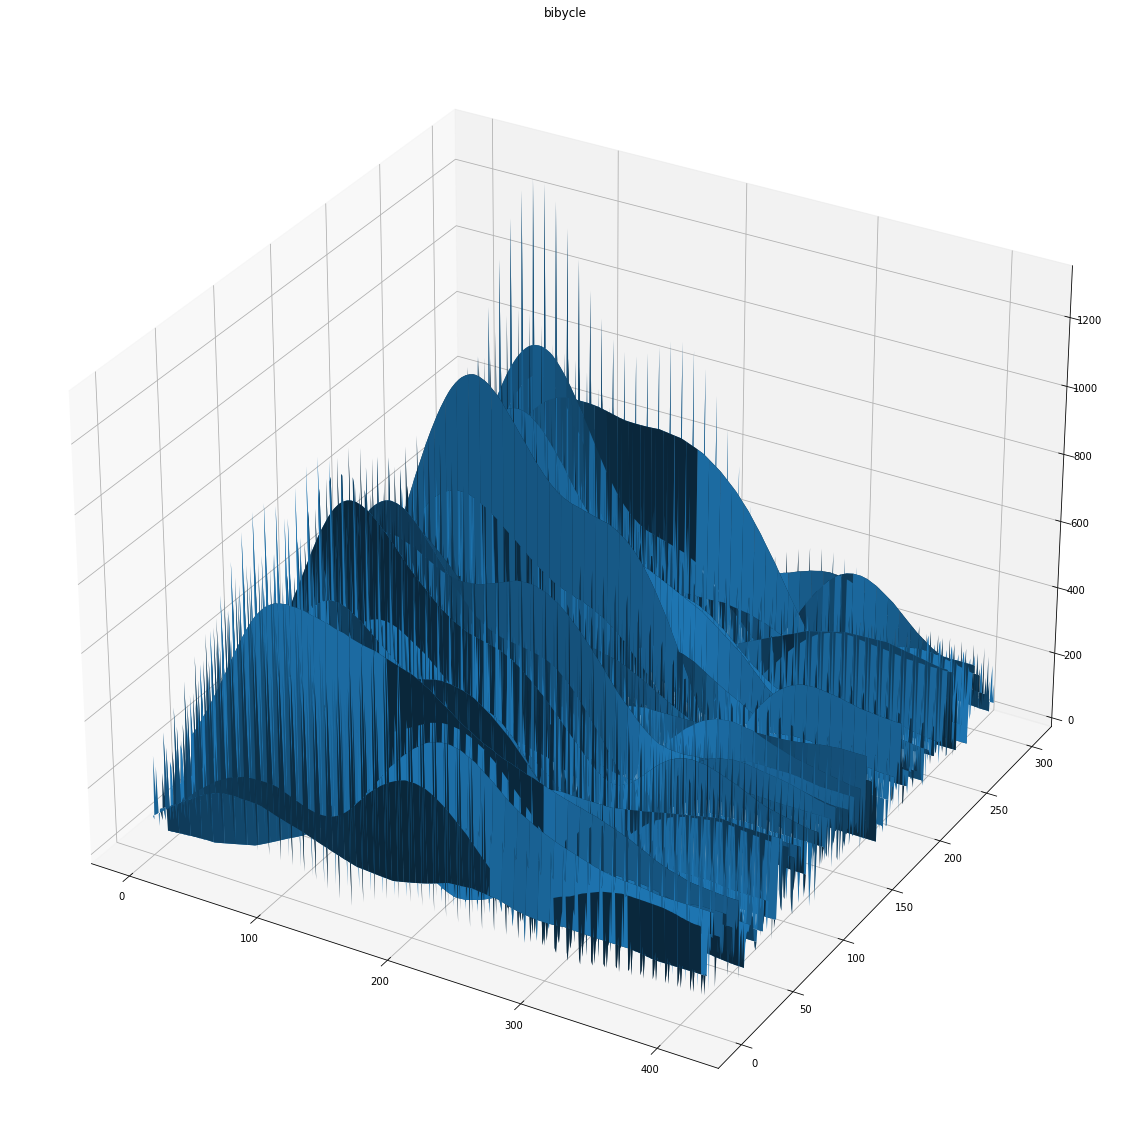

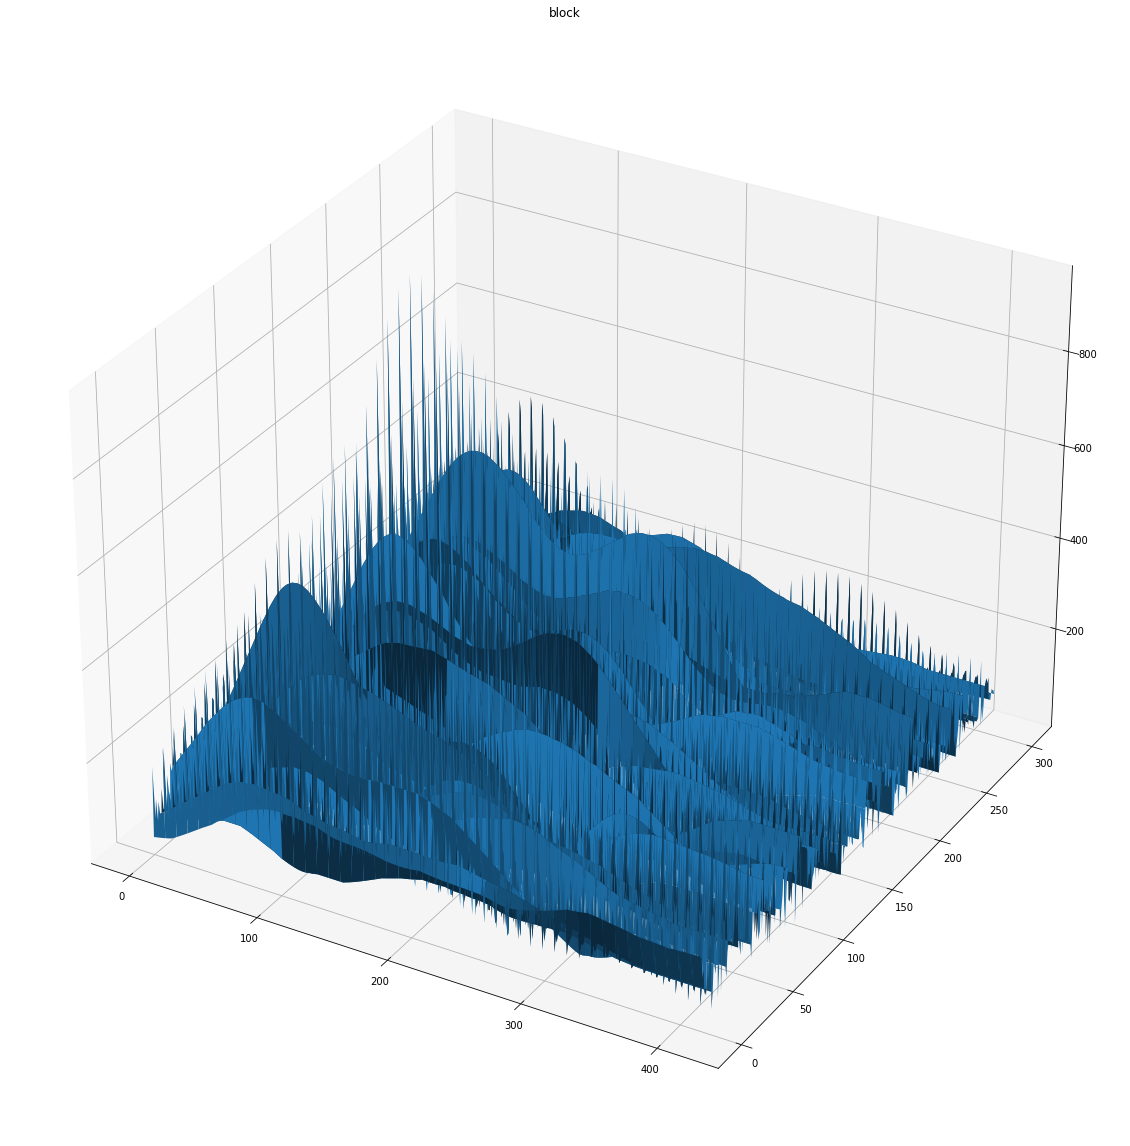

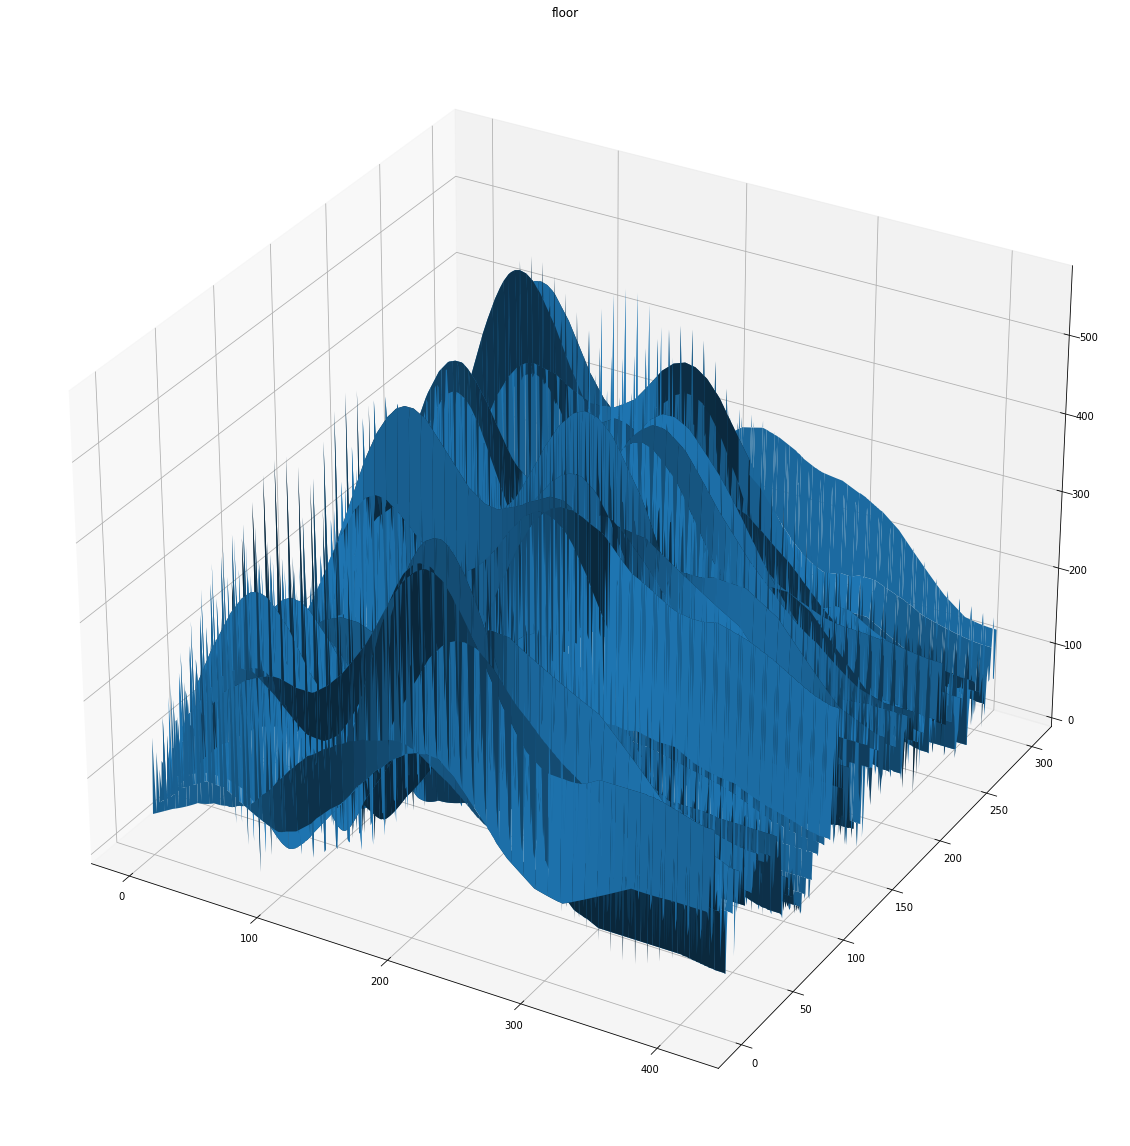

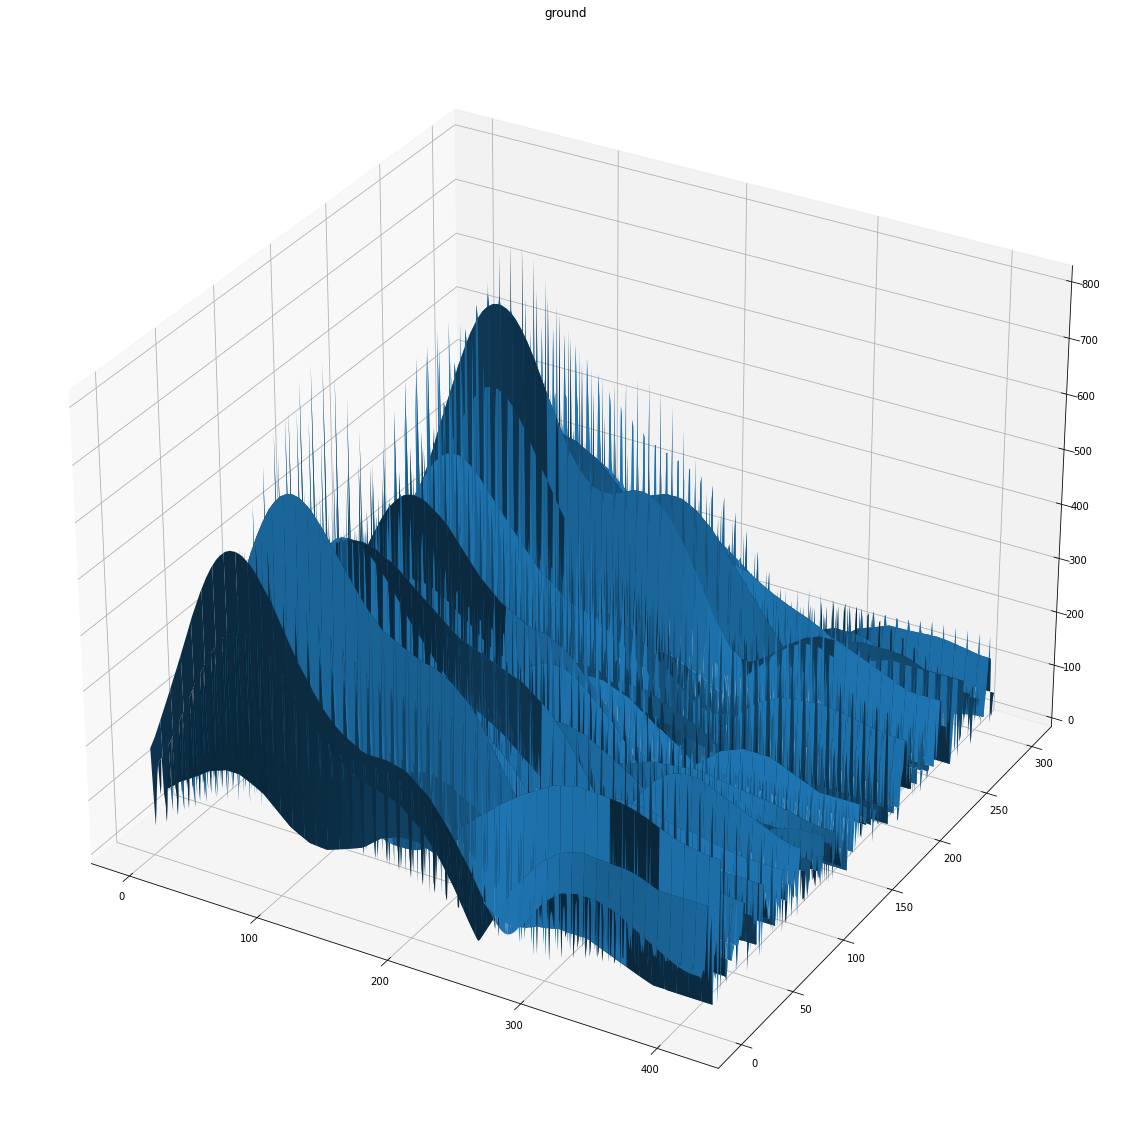

In [20]:
plot_3d(X, Y, asphalt, 'asphalt')
plot_3d(X, Y, bicycle, 'bibycle')
plot_3d(X, Y, block, 'block')
plot_3d(X, Y, floor, 'floor')
plot_3d(X, Y, ground, 'ground')

In [17]:
print(data_dict.keys())

dict_keys(['asphalt', 'bicycle', 'block', 'floor', 'ground'])


In [97]:
print(data_dict['block'].shape)

(2, 300, 414)


In [108]:
fig = plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

asphalt
(300, 414)
bicycle
(300, 414)
block
(300, 414)
floor
(300, 414)
ground
(300, 414)


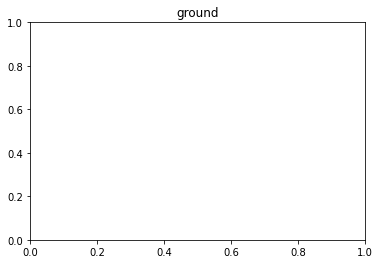

In [102]:
num = 5
for j in range(num):
    axes = fig.add_subplot(num, 1, j+1, projection='3d')
    key = list(data_dict.keys())[j]
    print(key)
    z = data_dict[key][0][:]
    print(z.shape)
    # axes = plt.axes(projection='3d')
    axes.plot_surface(X, Y, z)
    plt.title(list(data_dict.keys())[j])
plt.show()

In [109]:
num, j = 5, 1
axes = fig.add_subplot(num, 1, j+1, projection='3d')
key = list(data_dict.keys())[j]
print(key)
z = data_dict[key][0][:]
print(z.shape)
# axes = plt.axes(projection='3d')
axes.plot_surface(X, Y, z)
# plt.title(list(data_dict.keys())[j])
plt.show()

bicycle
(300, 414)


In [48]:
def animate(frame, *fargs):
    data = fargs[0]
    x = np.linspace(0, len(data[1][frame]), len(data[1][frame]))
    y = data[1][frame]
    line.set_data(x,y)
    return line

In [49]:
print(asphalt.shape)

(2, 300, 414)


In [50]:
def save_plot(data, name):
    ani = FA(fig, animate, frames=300, fargs = (data,), interval=100, repeat=True)
    FFwriter = animation.FFMpegWriter(fps=10)
    ani.save((str(name) + '.mp4'), writer=FFwriter)
    plt.show()

In [51]:
save_plot(asphalt, 'asphalt')
save_plot(floor, 'floor')
save_plot(block, 'block')
save_plot(block2, 'block2')
save_plot(bicycle, 'bicycle')
save_plot(ground, 'ground')

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'

In [ ]:
print(asphalt[1].shape)

(300, 414)


In [ ]:
asphalt_mean = np.mean(asphalt[0], axis = 0)
floor_mean = np.mean(floor[0], axis = 0)
block_mean = np.mean(block[0], axis=0)
block2_mean = np.mean(block[0], axis=0)

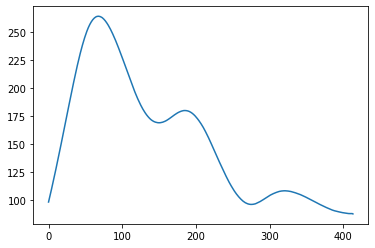

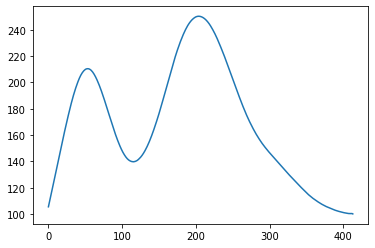

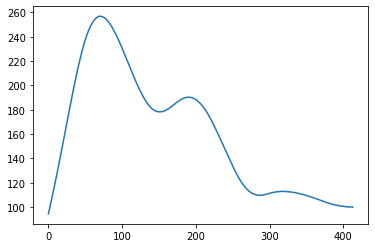

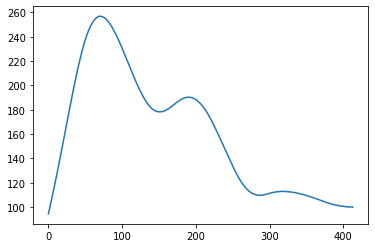

In [ ]:
plt.plot(asphalt_mean)
plt.show()
plt.plot(floor_mean)
plt.show()
plt.plot(block_mean)
plt.show()
plt.plot(block2_mean)
plt.show()

In [ ]:
asphalt_fn = './asphalt.mp4'
block_fn = './block.mp4'
block2_fn = './block2.mp4'
floor_fn = './floor.mp4'

In [10]:
asphalt.shape

(2, 300, 414)

In [12]:
fs = 1000
dt = 1/fs
nfft = asphalt.shape[2]
df = nfft/fs
fft = np.fft.fft(asphalt[0][0])

In [15]:
print(fft.shape)

(414,)


/data_disk/home/joongho/.conda/envs/radar/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


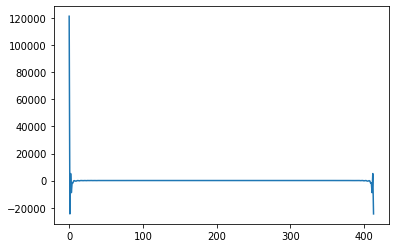

In [13]:
plt.plot(fft)